In [1]:
###################################################################################################################
#                                   ''' Download & Split the mnist dataset '''                                    #
###################################################################################################################
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

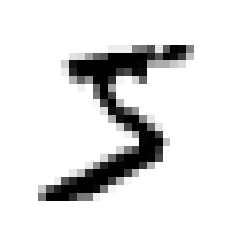

5


In [48]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

digit = X.iloc[0:1].values
digit_image = digit.reshape(28, 28)
plt.imshow(digit_image, cmap="binary")
plt.axis("off")
plt.show()
print(y[0])

In [3]:
###################################################################################################################
#                                     ''' Training a Binary Classifier '''                                        #
###################################################################################################################
from sklearn.linear_model import SGDClassifier

y_train_5 = (y_train == 5) # True for all 5s, False for all other digits
y_test_5 = (y_test == 5)

model = SGDClassifier(random_state=42)
model.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [4]:
model.predict(digit_to_predict)

array([ True])

In [5]:
###################################################################################################################
#                                        ''' Performance Measures '''                                             #
###################################################################################################################

## 1- Measuring Accuracy Using 3-Fold Cross-Validation
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.model_selection import cross_val_score

skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    print(len(train_index), len(test_index))
    print(train_index, test_index)
    clone_clf = clone(model)
    
    X_train_folds = X_train.iloc[train_index]
    y_train_folds = y_train_5[train_index]
    
    X_test_fold = X_train.iloc[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred)) # prints 0.9502, 0.96565, and 0.96495

cross_val_score(model, X_train, y_train_5, cv=3, scoring="accuracy") # array([0.95035, 0.96035, 0.9604 ])

40000 20000
[    1     3     4 ... 59994 59996 59998] [    0     2     6 ... 59995 59997 59999]
0.9669
40000 20000
[    0     2     3 ... 59997 59998 59999] [    1    10    11 ... 59988 59989 59991]
0.91625
40000 20000
[    0     1     2 ... 59995 59997 59999] [    3     4     5 ... 59994 59996 59998]
0.96785


array([0.95035, 0.96035, 0.9604 ])

In [6]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy") # array([0.91125, 0.90855, 0.90915])

array([0.91125, 0.90855, 0.90915])

In [7]:
## 2- Confusion Matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(model, X_train, y_train_5, cv=3)

[[53892   687]
 [ 1891  3530]]


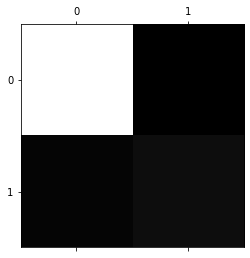

In [10]:
conf_mx = confusion_matrix(y_train_5, y_train_pred)
plt.matshow(conf_mx, cmap=plt.cm.gray)
print(conf_mx)
plt.show()

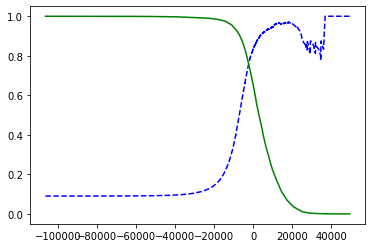

In [14]:
## 3-4- Precision and Recall
from sklearn.metrics import precision_recall_curve

y_scores = cross_val_predict(model, X_train, y_train_5, cv=3, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    [...] # highlight the threshold and add the legend, axis label, and grid
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

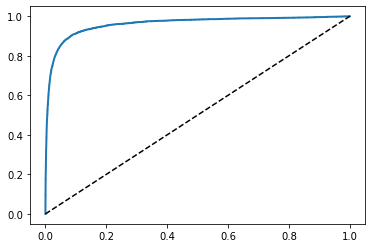

0.9604938554008616

In [19]:
## 5- The ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
    [...] # Add axis labels and grid
    
plot_roc_curve(fpr, tpr)
plt.show()
roc_auc_score(y_train_5, y_scores)



In [21]:
## 5- RandomForestClassifier VS Our SGDClassifier
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

y_scores_forest = y_probas_forest[:, 1]   # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

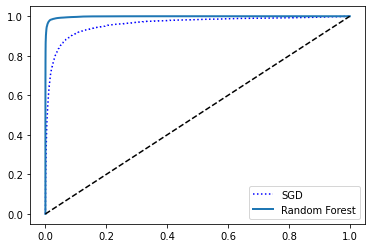

In [23]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [27]:
###################################################################################################################
#                                           ''' Error Analysis '''                                                #
###################################################################################################################

In [46]:
###################################################################################################################
#                                       ''' Multilabel Classification '''                                         #
###################################################################################################################
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

knn_clf.predict(digit)

array([[False,  True]])

In [53]:
###################################################################################################################
#                                       ''' Multioutput Classification '''                                        #
###################################################################################################################
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier()

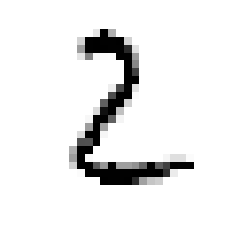

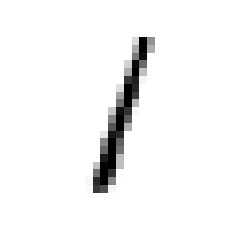

In [91]:
def plot_digit(digit):    
    digit_image = digit.reshape(28, 28)
    plt.imshow(digit_image, cmap="binary")
    plt.axis("off")
    plt.show()
    
digit_x = X_test_mod[2:3]
digit_y = y_test_mod[2:3].values

clean_digit = knn_clf.predict(digit)
plot_digit(clean_digit)
plot_digit(digit_y)